In [1]:
import os
import pandas as pd
import numpy as np
from itertools import product
from matplotlib import pyplot as plt

In [2]:
# load all book indices into storage and create a set of wikipedia concepts
path = "../dat/index_by_wiki/"
wiki_concepts = set()
indices = {}

def get_smallest_page(pages):
    if not isinstance(pages, float) and "nan" in pages: return None
    pages_int = [int(pages)] if isinstance(pages, float) else list(map(int, pages.split(",")))
    return min(pages_int)

for book in os.listdir(path):
    index = pd.read_csv(path + book).dropna()
    index['first_page'] = index.pages.apply(get_smallest_page) # add first page of index entry
    indices[book] = index
    wiki_concepts.update(index.wiki_concept) # add new concepts to set

wiki_list = list(wiki_concepts)
n = len(wiki_concepts)
print(str(len(wiki_concepts)) + " wikipedia concepts in total")

1303 wikipedia concepts in total


In [3]:
# compare a single pair of concepts
concept1 = wiki_list[2]
concept2 = wiki_list[1302]

for book, index in indices.items(): # over all books
    if concept1 in index.wiki_concept.values and concept2 in index.wiki_concept.values: # both concepts in this book
        first = index.first_page.iloc[index.wiki_concept.values==concept1].values[0]
        second = index.first_page.iloc[index.wiki_concept.values==concept2].values[0]
        print(concept1 + (" *before* " if first<second else " *after* ") + concept2 + " in " + book)
    else:
        print("Pair not in " + book)

Pair not in Kuttler-LinearAlgebra-AFirstCourse-2017A.csv
Pair not in Beezer_First_Course.csv
Pair not in textbook_Hoffman_Kunze.csv
Spectrum of a matrix *after* Minimal polynomial (linear algebra) in Nicholson-OpenLAWA-2019A.csv
Pair not in Linear algebra done right — Axler.csv
Pair not in Math1410_print.csv
Pair not in Hefferon_LinAlgebra.csv
Pair not in linear-Cherey, Denton.csv
Pair not in interactive_textbook.csv
Pair not in CollegeAlgCoreq-WEB.csv


In [4]:
# create 3D array with concept pair in the first two dimensions and book in the third dimension
adj = np.tile(np.nan, (n,n,len(indices.keys())))

for idx, index in enumerate(indices.values()):
    def get_first_page_for_concept(concept):
        vals = index.first_page.iloc[index.wiki_concept.values==concept].values
        return vals[0] if len(vals) else None
    first_pages = list(map(get_first_page_for_concept, wiki_concepts))
    combinations = product(first_pages, first_pages)
    comparisons = [
        1 * (page1 < page2) if page1 is not None and page2 is not None
        else None
        for (page1, page2) in combinations
    ]
    comparisons_2d = np.array(comparisons).reshape((n,n))
    np.fill_diagonal(comparisons_2d, None)
    adj[:,:,idx] = comparisons_2d

mean_adj = np.nanmean(adj,axis=2)

/var/folders/ly/txhzmb053hl2qybdkm0f018h0000gn/T/ipykernel_78850/4108088154.py:19: RuntimeWarning: Mean of empty slice
  mean_adj = np.nanmean(adj,axis=2)


## How much information do we have about our 848,253 pairs?

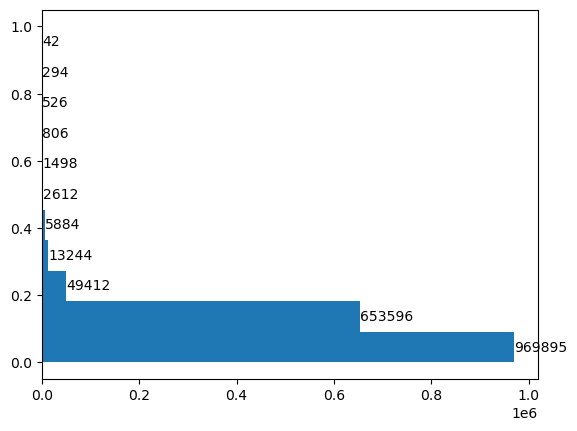

In [5]:
adj_info = np.invert(np.isnan(adj)).mean(axis=2)
counts, edges, bars = plt.hist(adj_info.ravel(),bins=11, orientation="horizontal")
plt.bar_label(bars)
plt.show()

## What is the distribution of comparison results?

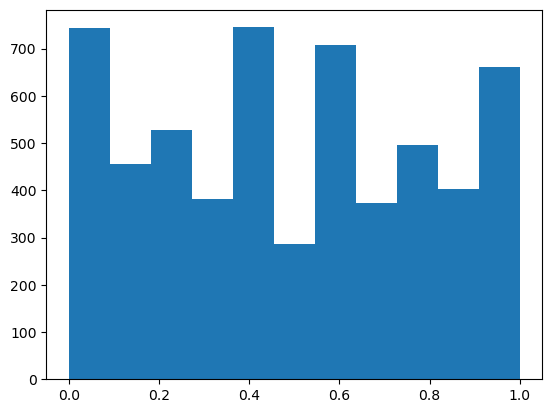

In [6]:
# let's only look at the comparisons where we have at least 5 books with both pairs in it
plt.hist(mean_adj[np.where(adj_info>=0.5)], bins=11)
plt.show()

## What are actual predicted dependencies?

In [7]:
idx = np.where(adj_info > .8)
np_wiki = np.array(wiki_list)

# print clear dependencies
np.array(list(zip(np_wiki[idx[0]], np_wiki[idx[1]], np.round(mean_adj[idx],1))))[np.where(mean_adj[idx]>.7)]

array([['Row and column spaces', 'Determinant', '0.8'],
       ['Matrix multiplication', 'Linear span', '0.9'],
       ['Matrix multiplication', 'Basis', '0.9'],
       ['Matrix multiplication', 'Transpose', '0.8'],
       ['Matrix multiplication', 'Diagonalizable matrix', '1.0'],
       ['Matrix multiplication', 'Eigenvalues and eigenvectors', '0.8'],
       ['Matrix multiplication', 'Determinant', '0.8'],
       ['Scalar multiplication', 'Determinant', '0.8'],
       ['Scalar multiplication', 'Identity matrix', '0.8'],
       ['Invertible matrix', 'Linear span', '0.8'],
       ['Invertible matrix', 'Basis', '0.8'],
       ['Invertible matrix', 'Diagonalizable matrix', '0.9'],
       ['Triangular matrix', 'Transpose', '0.8'],
       ['Triangular matrix', 'Diagonalizable matrix', '0.9'],
       ['Linear span', 'Basis', '0.9'],
       ['Linear span', 'Diagonalizable matrix', '0.9'],
       ['Basis', 'Diagonalizable matrix', '0.9'],
       ['Linear independence', 'Basis', '0.9'],
       

In [9]:
# print unclear dependencies
np.array(list(zip(np_wiki[idx[0]], np_wiki[idx[1]], np.round(mean_adj[idx],1))))[np.where((mean_adj[idx]<.7)&(mean_adj[idx]>.3))]

array([['Row and column spaces', 'Matrix multiplication', '0.6'],
       ['Row and column spaces', 'Invertible matrix', '0.4'],
       ['Row and column spaces', 'Triangular matrix', '0.4'],
       ['Row and column spaces', 'Row and column vectors', '0.4'],
       ['Row and column spaces', 'Row echelon form', '0.3'],
       ['Row and column spaces', 'Matrix (mathematics)', '0.4'],
       ['Row and column spaces', 'Identity matrix', '0.3'],
       ['Matrix multiplication', 'Row and column spaces', '0.4'],
       ['Matrix multiplication', 'Scalar multiplication', '0.4'],
       ['Matrix multiplication', 'Complex number', '0.6'],
       ['Matrix multiplication', 'Triangular matrix', '0.5'],
       ['Matrix multiplication', 'Linear independence', '0.7'],
       ['Matrix multiplication', 'Rank (linear algebra)', '0.4'],
       ['Matrix multiplication', 'Row and column vectors', '0.6'],
       ['Matrix multiplication', 'Elementary matrix', '0.3'],
       ['Matrix multiplication', 'Linear map'